## __Author__ : Diba Elahi
## __Course__ : Machine Learning
## __Assignment No. 4__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,  HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold,  StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import TargetEncoder
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures
import scipy.stats as stats
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer,  ConfusionMatrixDisplay, PrecisionRecallDisplay

##  EDA

In [ ]:
df = pd.read_csv("Ad.csv")

In [ ]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
5,51.30,26.0,51463.17,131.68,Focused multi-state workforce,Port Maria,Female,Cameroon,2016-05-15 13:18:34,0
6,66.08,43.0,73538.09,136.40,Optimized upward-trending productivity,Port Jeffrey,Male,Turkey,2016-04-03 21:13:46,1
7,36.08,26.0,74903.41,228.78,Programmable uniform website,East Kevinbury,Male,French Guiana,2016-03-11 06:49:10,0
8,46.14,33.0,43974.49,196.77,Customizable tangible hierarchy,Lake Annashire,Male,Vanuatu,2016-03-24 06:36:52,0
9,51.65,51.0,74535.94,188.56,Function-based incremental standardization,Edwardmouth,Female,Cameroon,2016-01-31 05:12:44,0


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,10000.0,61.660757,15.704142,32.60,48.8600,59.59,76.58,90.97
Age,10000.0,35.940100,8.572973,19.00,29.0000,35.00,42.00,60.00
Area Income,10000.0,53840.047721,13343.708718,13996.50,44052.3025,56180.93,61840.26,79332.33
Daily Internet Usage,10000.0,177.759831,40.820951,105.22,140.1500,178.92,212.67,269.96
Clicked on Ad,10000.0,0.491700,0.499956,0.00,0.0000,0.00,1.00,1.00


In [ ]:
df['Ad Topic Line'].unique().size

559

<AxesSubplot:xlabel='Clicked on Ad'>

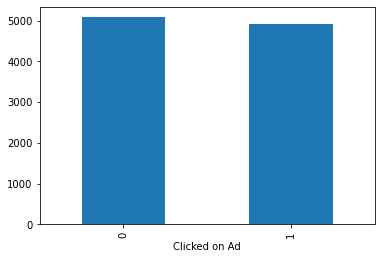

In [ ]:
plot_df = df['Clicked on Ad'].value_counts()
plot_df.plot(kind="bar")

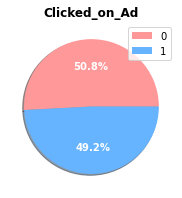

In [ ]:
plt.figure(figsize = (4, 3.1))
plt.pie(x = list(Counter(df['Clicked on Ad']).values()),
        labels = list(Counter(df['Clicked on Ad']).keys()),
        colors = ["#ff9999", "#66b3ff"] ,
        autopct = "%.1f%%",
        shadow = True,
        textprops = {'fontsize':10, 'fontweight':'bold', 'color':'white'})
plt.legend(loc = 'upper right')
plt.title("Clicked_on_Ad", fontsize = 12, fontweight = "bold", color = "black")
plt.show()

/var/folders/pl/rj51d0nd3px9yj51mmkwv1d40000gn/T/ipykernel_1617/1212370090.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


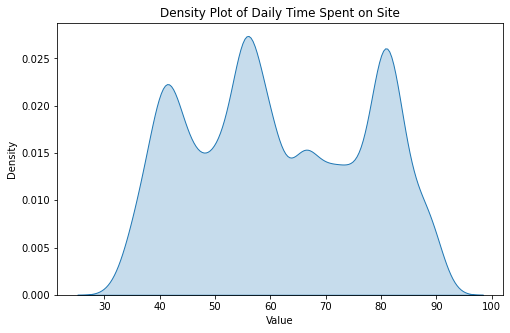

/var/folders/pl/rj51d0nd3px9yj51mmkwv1d40000gn/T/ipykernel_1617/1212370090.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


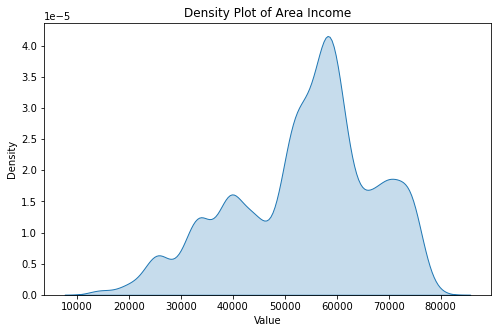

/var/folders/pl/rj51d0nd3px9yj51mmkwv1d40000gn/T/ipykernel_1617/1212370090.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


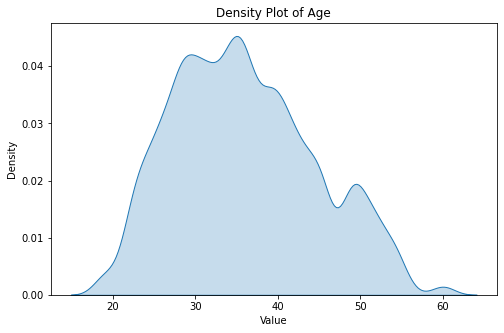

/var/folders/pl/rj51d0nd3px9yj51mmkwv1d40000gn/T/ipykernel_1617/1212370090.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


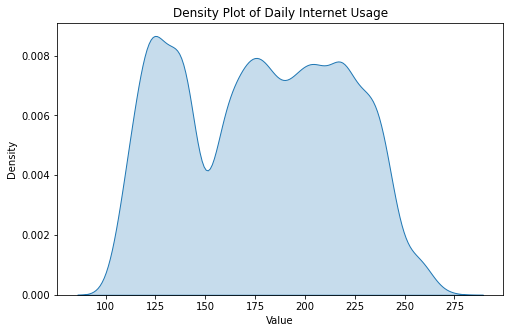

/var/folders/pl/rj51d0nd3px9yj51mmkwv1d40000gn/T/ipykernel_1617/1212370090.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


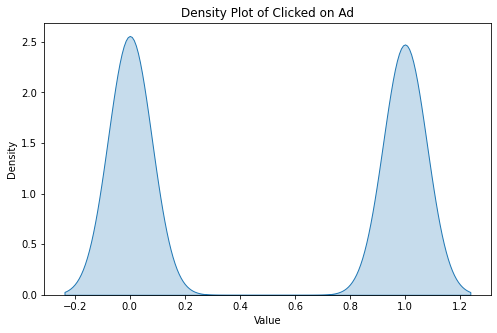

In [ ]:
def plot_density(df, columns):
    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            plt.figure(figsize=(8, 5))
            sns.kdeplot(df[column], shade=True)
            plt.title(f'Density Plot of {column}')
            plt.xlabel('Value')
            plt.ylabel('Density')
            plt.show()
        else:
            print(f"Column {column} is not numeric and cannot be plotted.")

numerical_columns = ['Daily Time Spent on Site', 'Area Income', 'Age', 'Daily Internet Usage', 'Clicked on Ad']

plot_density(df, numerical_columns)


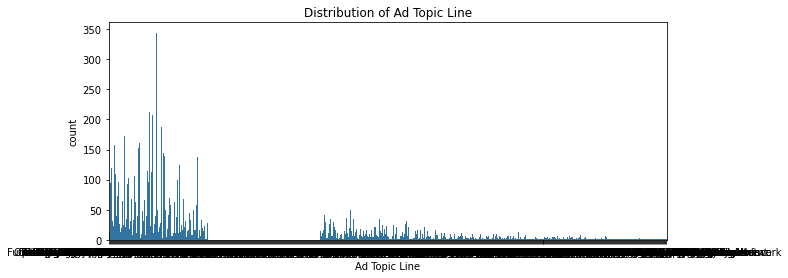

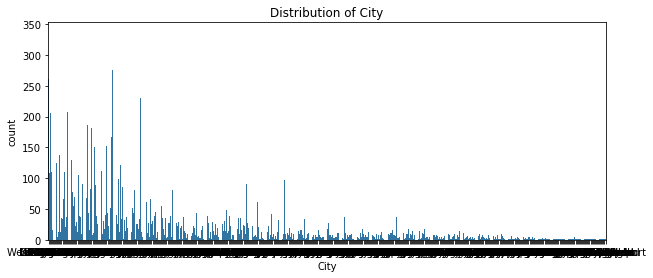

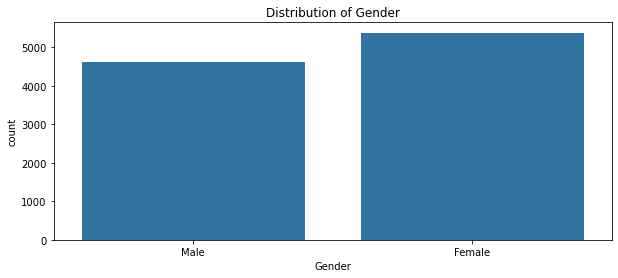

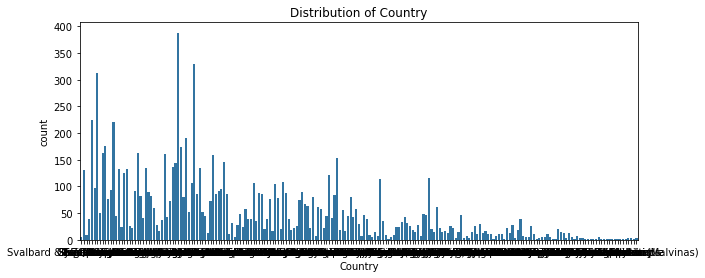

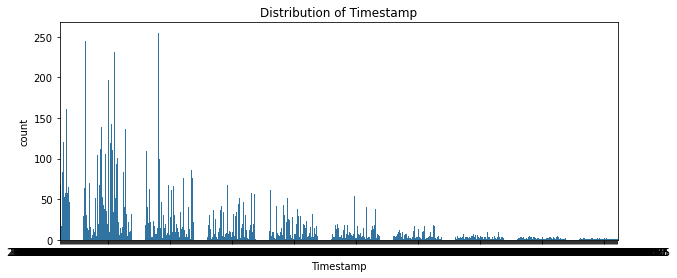

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for feature in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

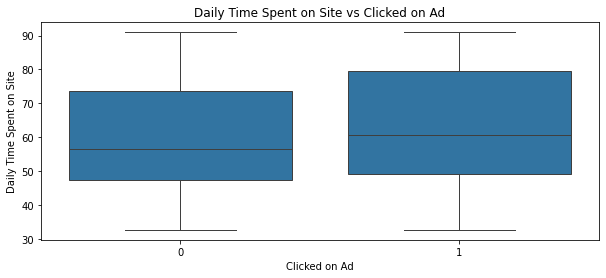

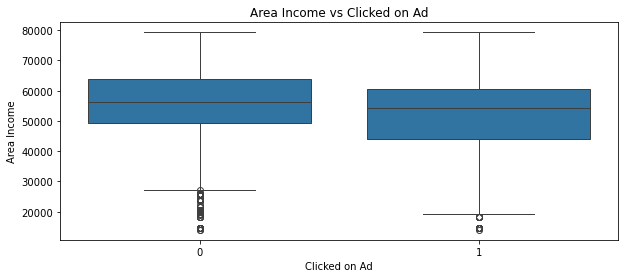

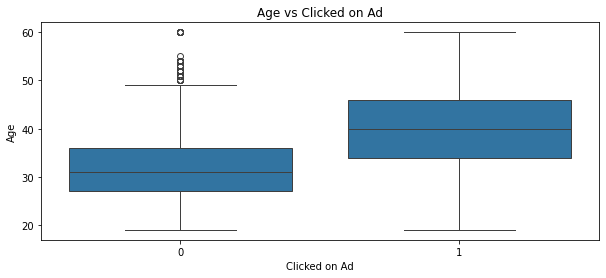

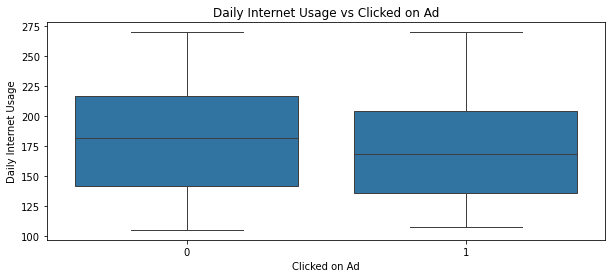

In [ ]:
for feature in numerical_columns:
    if feature != 'Clicked on Ad':
        plt.figure(figsize=(10, 4))
        sns.boxplot(x='Clicked on Ad', y=feature, data=df)
        plt.title(f'{feature} vs Clicked on Ad')
        plt.show()

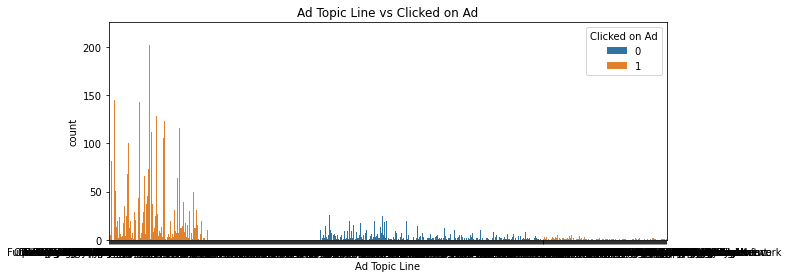

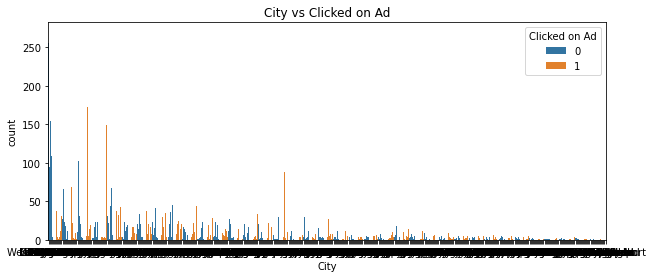

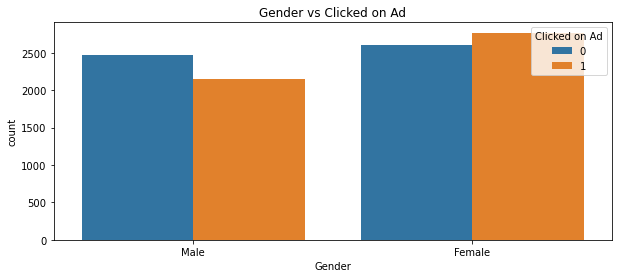

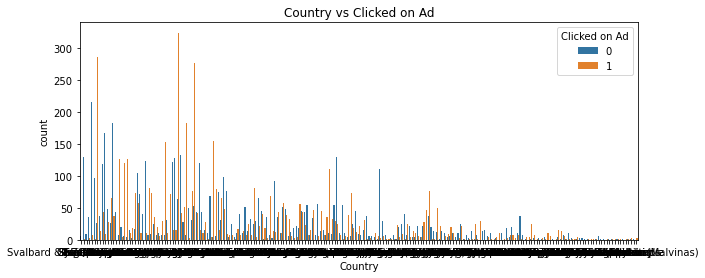

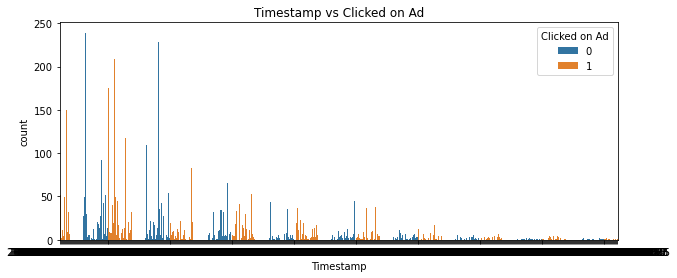

In [ ]:
for feature in categorical_columns:
    if feature != 'Clicked on Ad':
        plt.figure(figsize=(10, 4))
        sns.countplot(x=feature, hue='Clicked on Ad', data=df)
        plt.title(f'{feature} vs Clicked on Ad')
        plt.show()

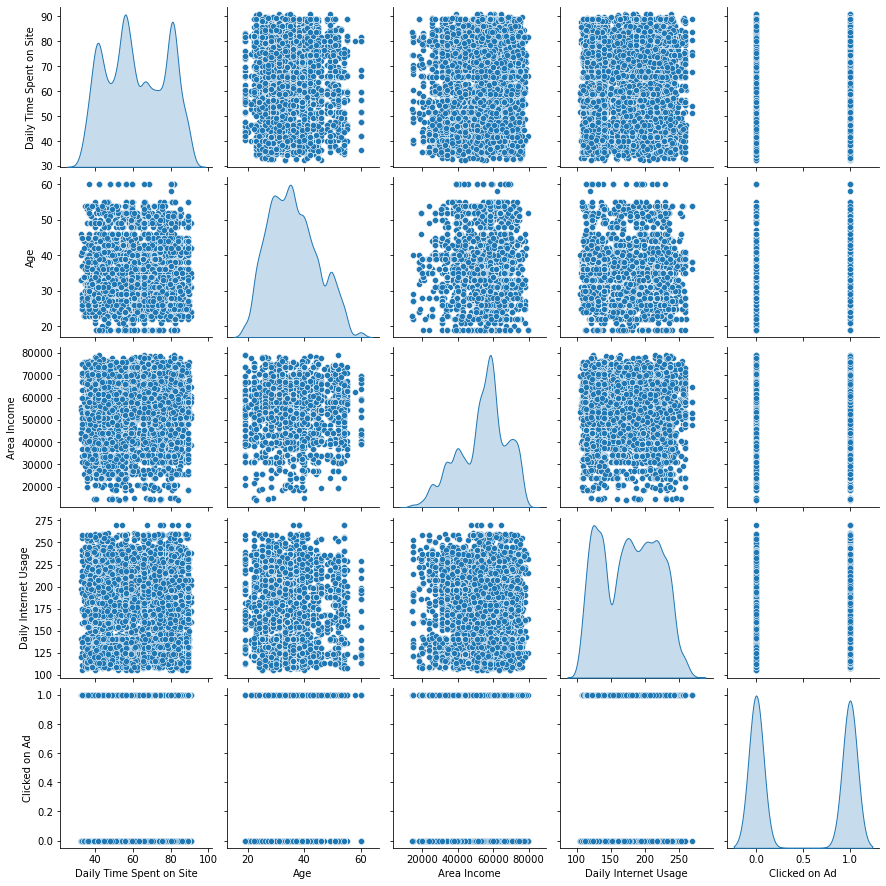

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.show()

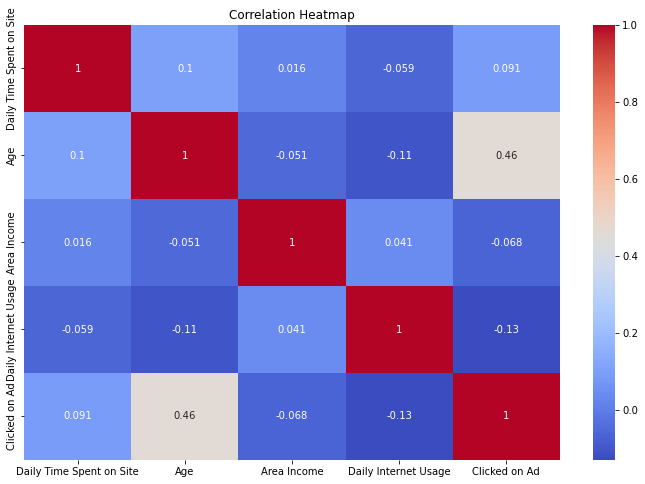

In [ ]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/var/folders/pl/rj51d0nd3px9yj51mmkwv1d40000gn/T/ipykernel_1617/4189881044.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == "Female"]['Age'], label='Female', shade=True)
/var/folders/pl/rj51d0nd3px9yj51mmkwv1d40000gn/T/ipykernel_1617/4189881044.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == "Male"]['Age'], label='Male', shade=True)


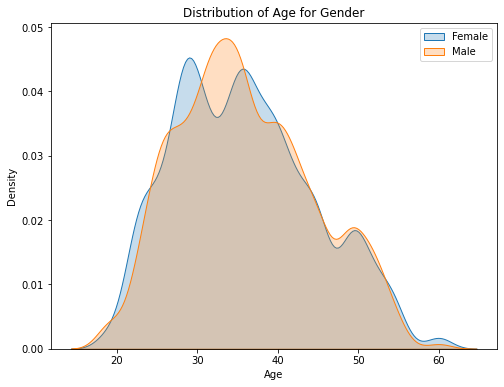

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Gender'] == "Female"]['Age'], label='Female', shade=True)
sns.kdeplot(df[df['Gender'] == "Male"]['Age'], label='Male', shade=True)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age for Gender')
plt.legend()
plt.show()

In [ ]:
def chi_square_test(column_name):
    contingency_table = pd.crosstab(df[column_name], df['Clicked on Ad'])
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    return p

# Perform Chi-Square test for 'City' and 'Country'
p_value_city = chi_square_test('City')
p_value_country = chi_square_test('Country')
p_value_ad_topic_line = chi_square_test('Ad Topic Line')
print(f'P-value for City: {p_value_city}')
print(f'P-value for Country: {p_value_country}')
print(f'P-value for Ad Topic Line: {p_value_ad_topic_line}')

P-value for City: 0.0
P-value for Country: 0.0
P-value for Ad Topic Line: 0.0


## Every part of the code belowe from preprocessing to model training and evaluation is separately documented on my report, not in this notebook, so please check there for my detailed report.

## Preprocessing

In [ ]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
X = df.drop(['Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

In [ ]:
class DatetimeFeatures:
    def __init__(self, features_to_extract):
        self.features_to_extract = features_to_extract

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for feature in self.features_to_extract:
            if feature == 'year':
                X['year'] = X['Timestamp'].dt.year
            elif feature == 'month':
                X['month'] = X['Timestamp'].dt.month
            elif feature == 'day_of_week':
                X['day_of_week'] = X['Timestamp'].dt.dayofweek
            elif feature == 'hour':
                X['hour'] = X['Timestamp'].dt.hour
            elif feature == 'minute':
                X['minute'] = X['Timestamp'].dt.minute
            elif feature == 'second':
                X['second'] = X['Timestamp'].dt.second
        return X.drop('Timestamp', axis=1)

class CyclicalFeatures:
    def __init__(self, drop_original=True):
        self.drop_original = drop_original

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col in X.columns:
            if 'month' in col:
                X['month_sin'] = np.sin(2 * np.pi * X[col]/12)
                X['month_cos'] = np.cos(2 * np.pi * X[col]/12)
            elif 'day_of_week' in col:
                X['day_of_week_sin'] = np.sin(2 * np.pi * X[col]/7)
                X['day_of_week_cos'] = np.cos(2 * np.pi * X[col]/7)
            elif 'hour' in col:
                X['hour_sin'] = np.sin(2 * np.pi * X[col]/24)
                X['hour_cos'] = np.cos(2 * np.pi * X[col]/24)
        if self.drop_original:
            X = X.drop(col, axis=1)
        return X

timestamp_pipeline = Pipeline([
    ('extract_features_time', DatetimeFeatures(features_to_extract=["year", "month", "day_of_week", "hour", "minute", "second"])),
    ('cyclical_feature', CyclicalFeatures(drop_original=True))
])

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
timestamp_features = ['Timestamp']

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('timestamp', timestamp_pipeline, timestamp_features)
    ])


In [ ]:
X['Timestamp'] = pd.to_datetime(X['Timestamp'])

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

## Model Training and Evaluation Metrics

<Figure size 576x432 with 0 Axes>

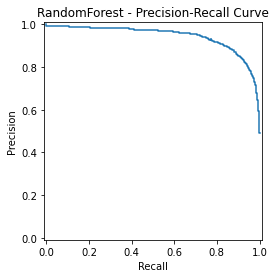

<Figure size 576x432 with 0 Axes>

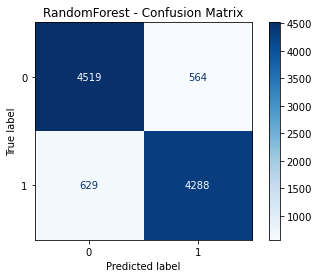

RandomForest Classifier:
Accuracy: 0.8807
Precision: 0.8807
Recall: 0.8807
F1 Score: 0.8807
------------------------------


<Figure size 576x432 with 0 Axes>

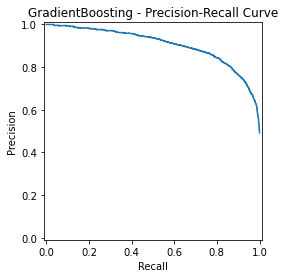

<Figure size 576x432 with 0 Axes>

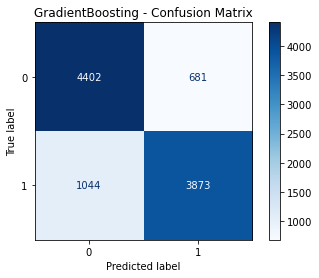

GradientBoosting Classifier:
Accuracy: 0.8275
Precision: 0.8290
Recall: 0.8275
F1 Score: 0.8272
------------------------------


<Figure size 576x432 with 0 Axes>

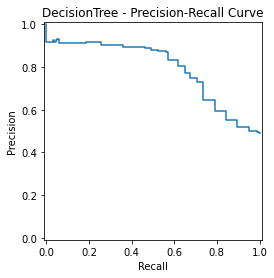

<Figure size 576x432 with 0 Axes>

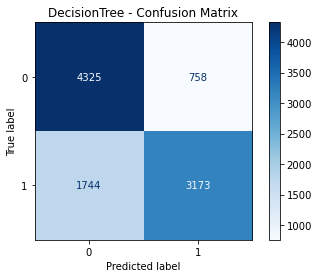

DecisionTree Classifier:
Accuracy: 0.7498
Precision: 0.7591
Recall: 0.7498
F1 Score: 0.7469
------------------------------


In [ ]:
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'DecisionTree' : DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=5, random_state=42)
}

def evaluate_classifier(name, classifier, X, y):
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    y_pred = cross_val_predict(model_pipeline, X, y, cv=5)

    y_scores = cross_val_predict(model_pipeline, X, y, cv=5, method='predict_proba')[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_scores)

    plt.figure(figsize=(8, 6))
    PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title(f'{name} - Precision-Recall Curve')
    plt.show()

    conf_matrix = confusion_matrix(y, y_pred)

    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues', values_format='d')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f'{name} Classifier:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('-' * 30)

for name, classifier in classifiers.items():
    evaluate_classifier(name, classifier, X, y)